In [1]:
import requests

# %%
response = requests.get("http://127.0.0.1:5000")
print(response.text)  # Print the content of the response



Hello, World!


In [2]:
response = requests.get("http://127.0.0.1:5000/generate/cat is running")

# %%
print(response)

response.content

<Response [200]>


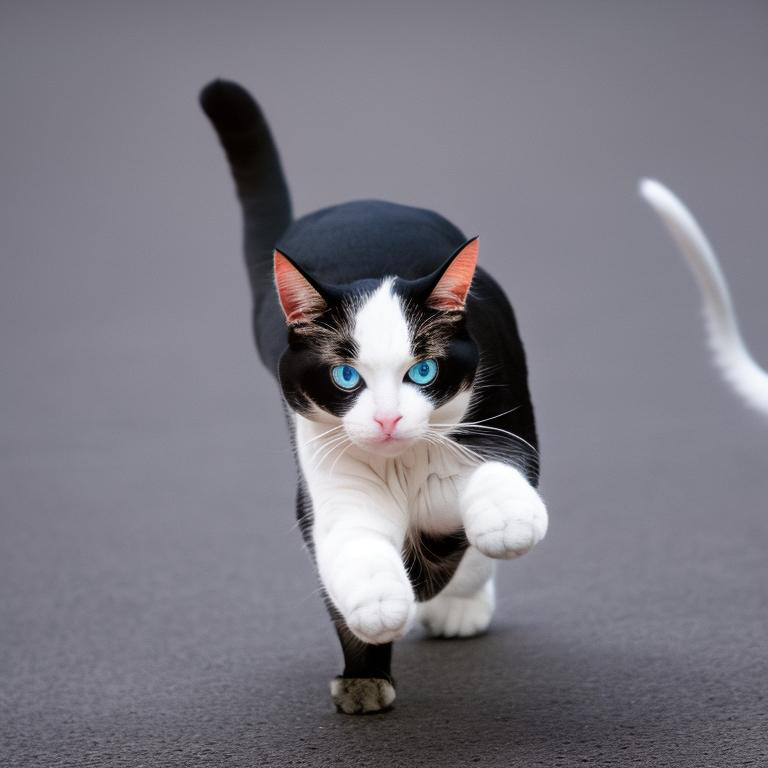

In [10]:

import io
from PIL import Image
def to_Image(data : bytes):
    
    image_io = io.BytesIO(data)
    
    
    return Image.open(image_io)

to_Image(response.content)

In [4]:
%pip install -U flask

  Using cached flask-3.0.0-py3-none-any.whl (99 kB)
  Using cached werkzeug-3.0.0-py3-none-any.whl (226 kB)
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6
  Attempting uninstall: flask
    Found existing installation: Flask 2.3.2
    Uninstalling Flask-2.3.2:
      Successfully uninstalled Flask-2.3.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
import json
from rich import print as rPrint
import io
from PIL import Image
import matplotlib.pyplot as plt



In [6]:

data = {
    # "model": "gpt-4",
    "message": "please give me a prompt only replay json format like {prompt:...}",
}


resource = requests.get("http://140.113.89.60:5000/chat", headers=data)


print(resource.text)


{ "prompt": "Write a story about a mysterious object that is discovered in an old attic." }


In [8]:

resource = requests.get("http://140.113.89.60:5000/generate", headers=resource.json())


def to_Image(data: bytes):
    image_io = io.BytesIO(data)

    return Image.open(image_io)


def plt_image(image):
    plt.imshow(image)
    plt.axis("off")  # Optionally, turn off the axis labels
    plt.show()



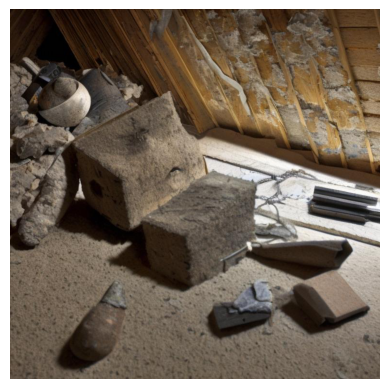

In [9]:

plt_image(to_Image(resource.content))
